In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Load the dataset
df = pd.read_csv('youtubers_df.csv')
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [3]:
# Perform basic data exploration
print(df.describe())

              Rank    Suscribers        Visits         Likes       Comments
count  1000.000000  1.000000e+03  1.000000e+03  1.000000e+03    1000.000000
mean    500.500000  2.189440e+07  1.209446e+06  5.363259e+04    1288.768000
std     288.819436  1.682775e+07  5.229942e+06  2.580457e+05    6778.188308
min       1.000000  1.170000e+07  0.000000e+00  0.000000e+00       0.000000
25%     250.750000  1.380000e+07  3.197500e+04  4.717500e+02       2.000000
50%     500.500000  1.675000e+07  1.744500e+05  3.500000e+03      67.000000
75%     750.250000  2.370000e+07  8.654750e+05  2.865000e+04     472.000000
max    1000.000000  2.495000e+08  1.174000e+08  5.300000e+06  154000.000000


In [4]:
# Check the structure of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB
None


In [5]:
# Check for missing data
print(df.isnull().sum())

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64


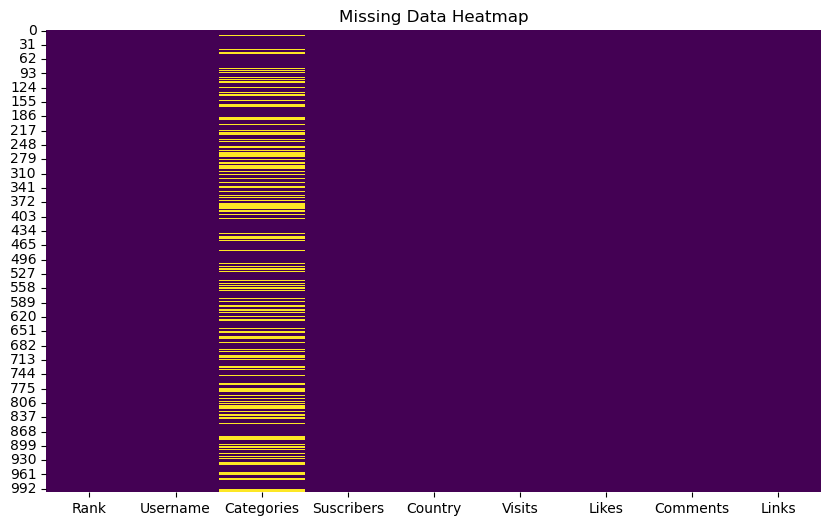

In [6]:
# Visualize missing data using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [7]:
df.dropna(inplace=True)
print(df.isnull().sum())

Rank          0
Username      0
Categories    0
Suscribers    0
Country       0
Visits        0
Likes         0
Comments      0
Links         0
dtype: int64


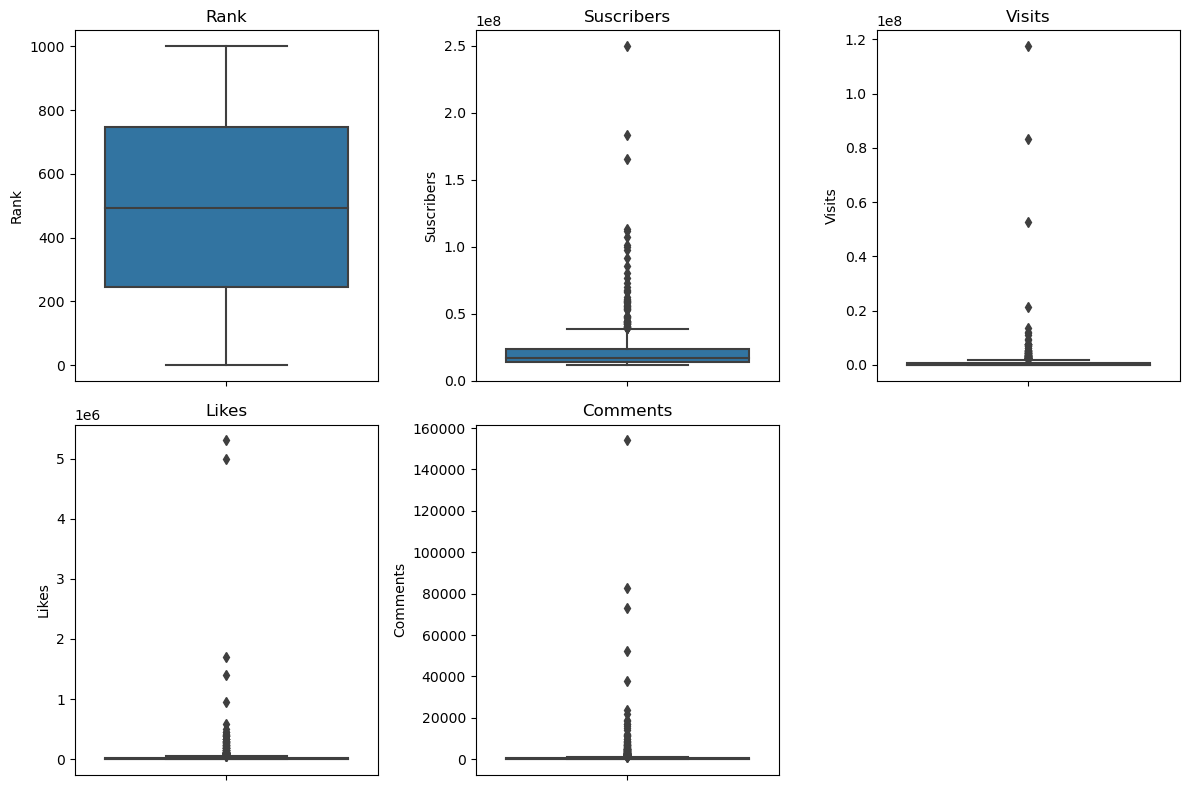

In [8]:
# Check for outliers using box plots
numeric_columns = ['Rank', 'Suscribers', 'Visits', 'Likes', 'Comments']
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, y=column)
    plt.title(column)
plt.tight_layout()
plt.show()

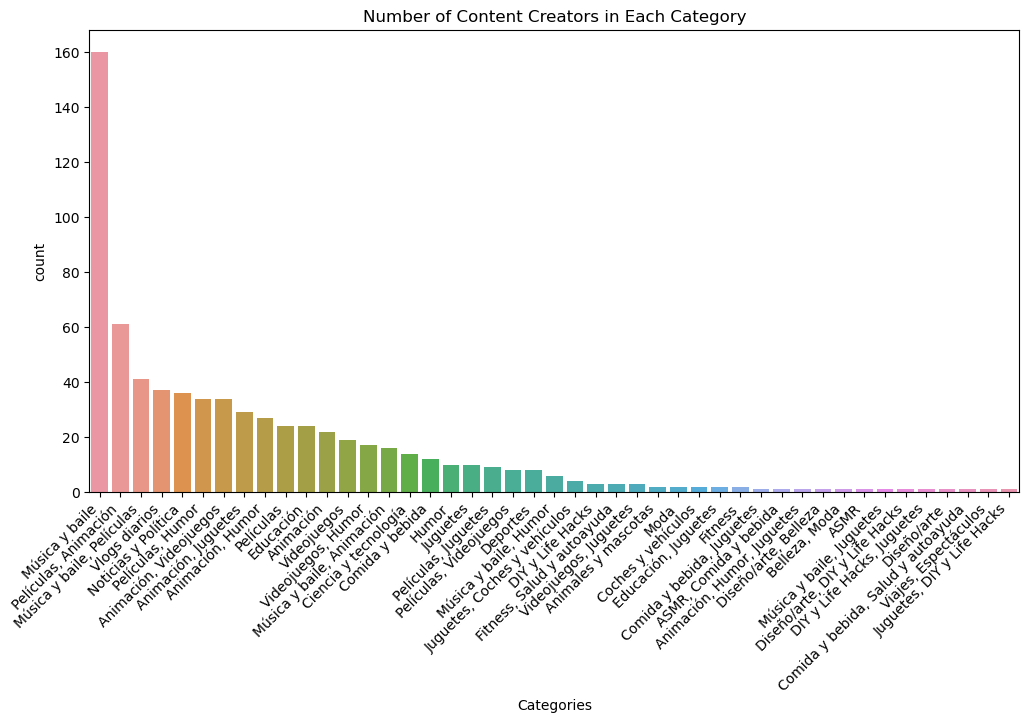

In [9]:
# Identify popular categories
plt.figure(figsize=(12, 6))
sns.countplot(x='Categories', data=df, order=df['Categories'].value_counts().index)
plt.title("Number of Content Creators in Each Category")
plt.xticks(rotation=45, ha='right')
plt.show()

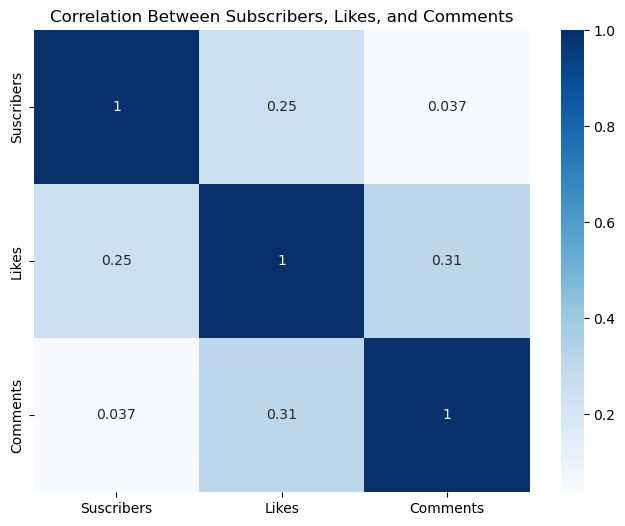

In [10]:
# Analyze the correlation between subscribers, likes, and comments
correlation_df = df[['Suscribers', 'Likes', 'Comments']]
correlation_matrix = correlation_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Between Subscribers, Likes, and Comments')
plt.show()

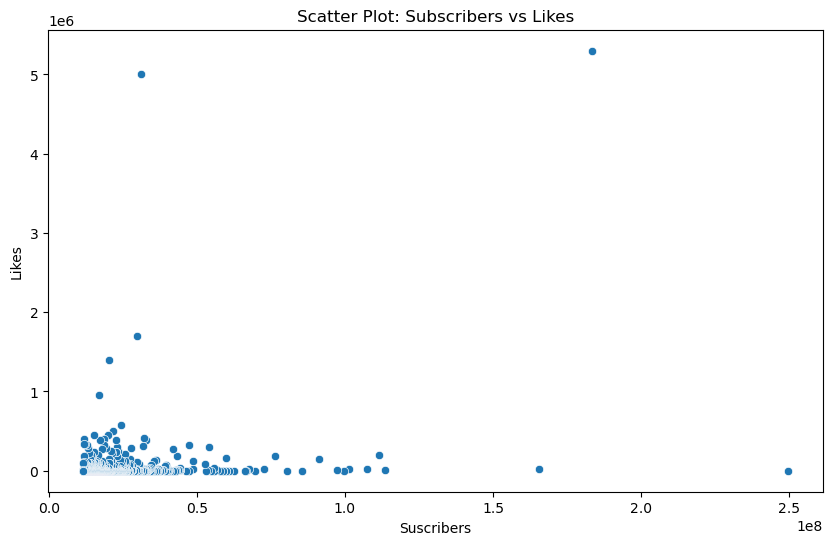

In [11]:
# Scatter plot for Subscribers vs Likes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Suscribers', y='Likes', data=df)
plt.title("Scatter Plot: Subscribers vs Likes")
plt.show()

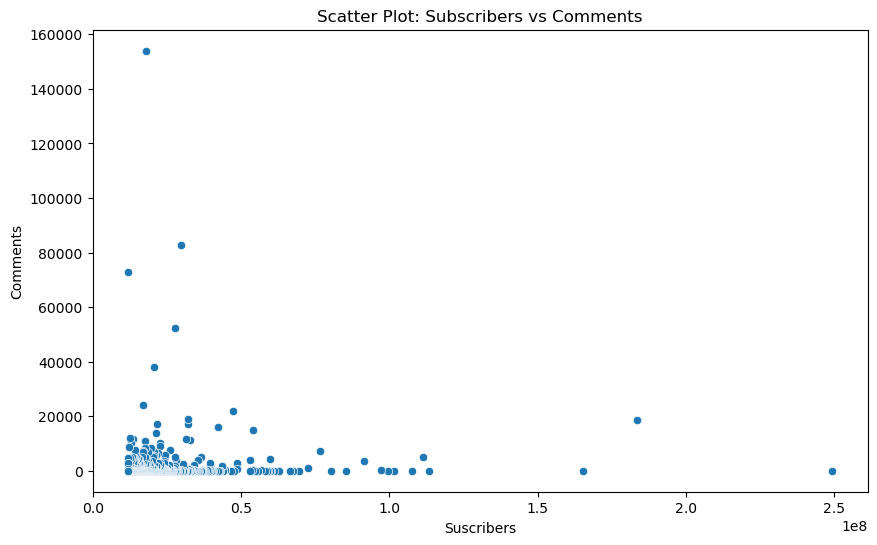

In [12]:
# Scatter plot for Subscribers vs Comments
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Suscribers', y='Comments', data=df)
plt.title("Scatter Plot: Subscribers vs Comments")
plt.show()

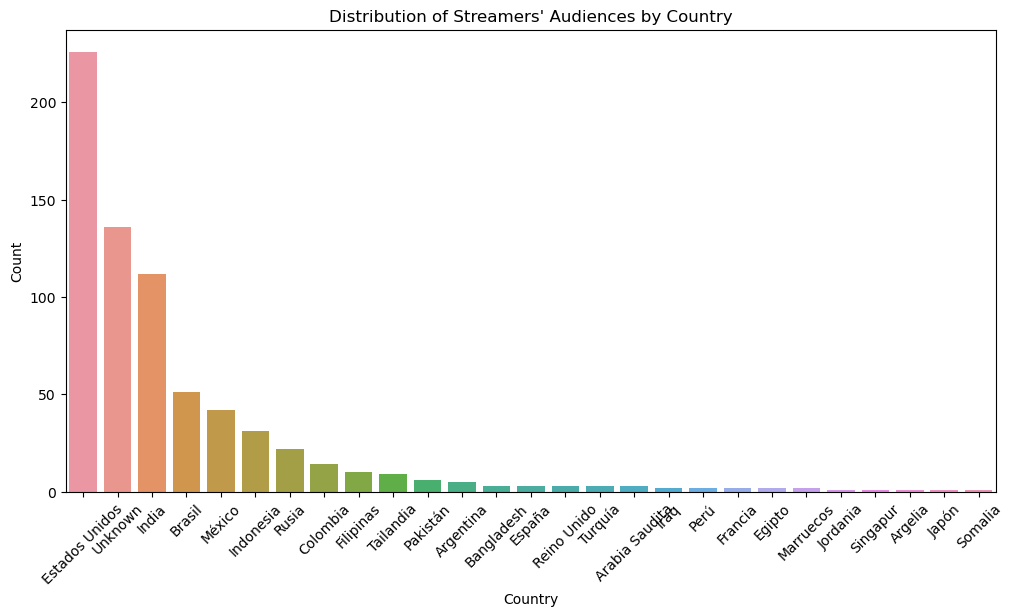

In [13]:
# Analyze the distribution of streamers' audiences by country
country_counts = df['Country'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Distribution of Streamers\' Audiences by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

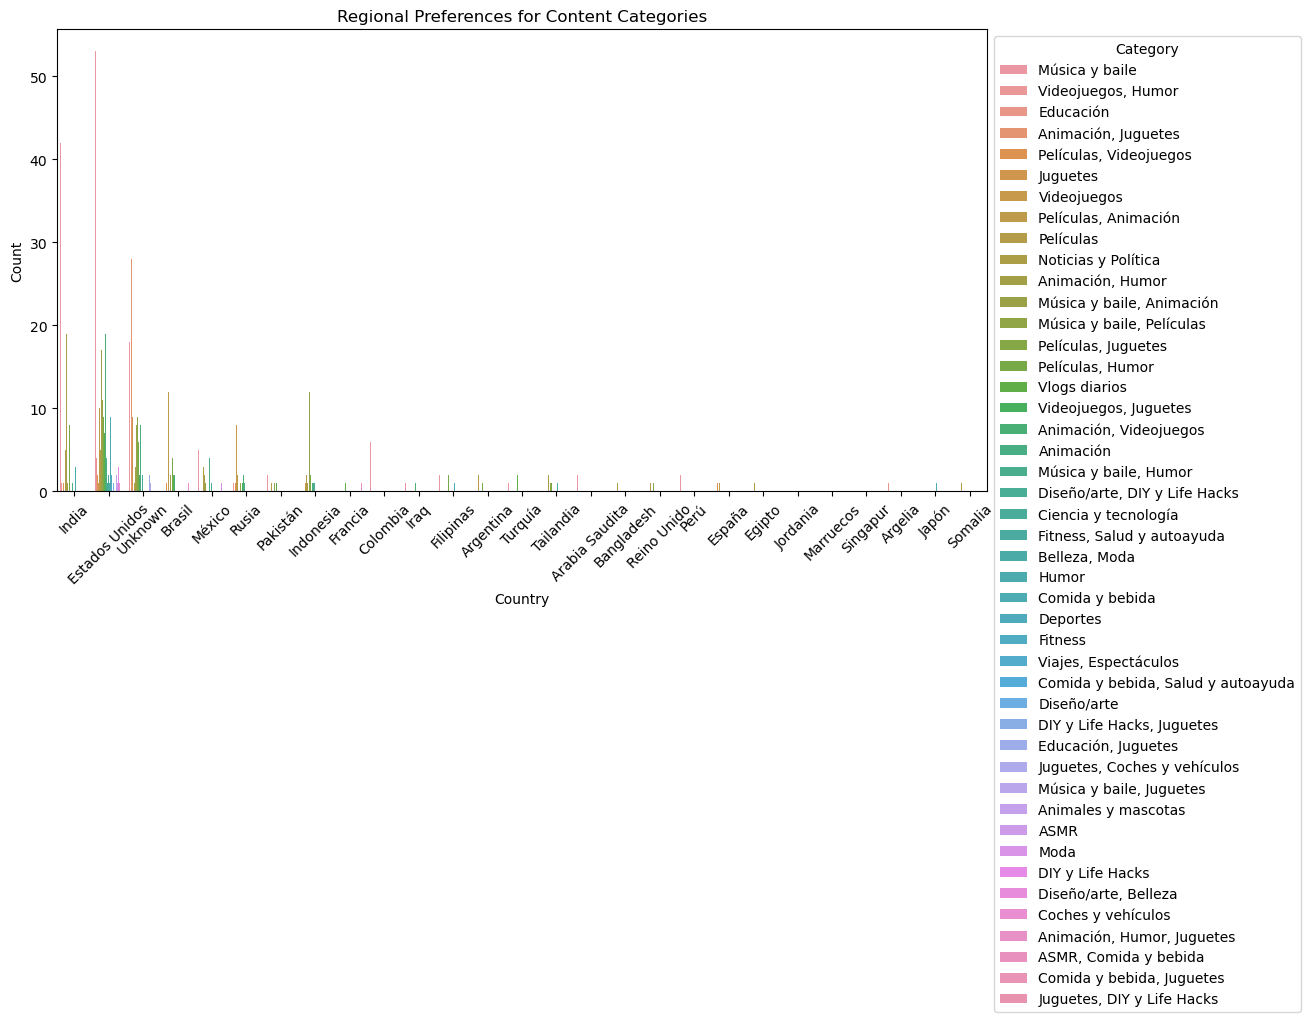

In [14]:
# Analyze regional preferences for specific content categories
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Country', hue='Categories')
plt.title('Regional Preferences for Content Categories')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1, 1))
plt.show()

In [15]:
# Calculate average metrics
average_subscribers = df['Suscribers'].mean()
average_visits = df['Visits'].mean()
average_likes = df['Likes'].mean()
average_comments = df['Comments'].mean()

print("Average Subscribers:", average_subscribers)
print("Average Visits:", average_visits)
print("Average Likes:", average_likes)
print("Average Comments:", average_comments)

Average Subscribers: 22415561.95965418
Average Visits: 1210729.6829971182
Average Likes: 53473.59798270893
Average Comments: 1558.793948126801


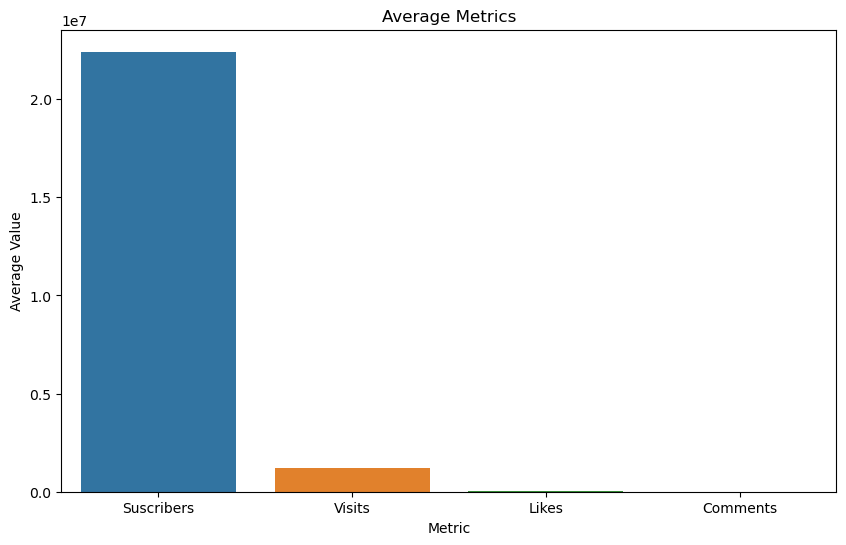

In [16]:
# Visualize average metrics
metrics = ['Suscribers', 'Visits', 'Likes', 'Comments']
average_values = [average_subscribers, average_visits, average_likes, average_comments]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=average_values)
plt.title('Average Metrics')
plt.xlabel('Metric')
plt.ylabel('Average Value')
plt.show()

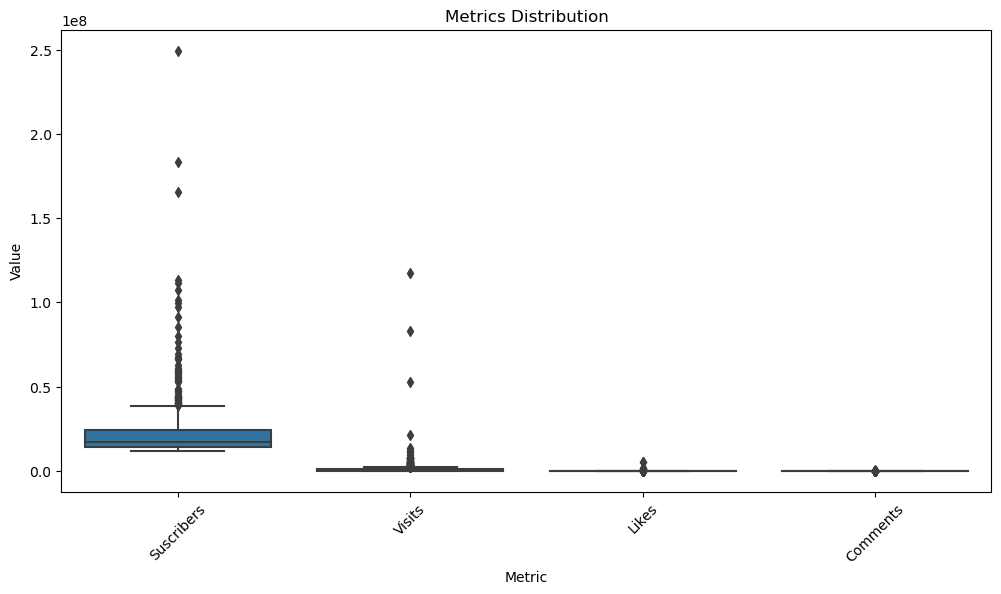

In [17]:
# Detect patterns or anomalies in metrics
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[metrics])
plt.title('Metrics Distribution')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

In [18]:
# Identify categories with the highest number of streamers
top_categories = df['Categories'].value_counts().head(5)
print("Top Categories with the Highest Number of Streamers:")
print(top_categories)

Top Categories with the Highest Number of Streamers:
Música y baile               160
Películas, Animación          61
Música y baile, Películas     41
Vlogs diarios                 37
Noticias y Política           36
Name: Categories, dtype: int64


In [19]:
# Calculate performance metrics by category
category_metrics = df.groupby('Categories')[['Suscribers', 'Visits', 'Likes', 'Comments']].mean().reset_index()

In [20]:
# Identify streamers with above-average performance
above_average_subscribers = df[df['Suscribers'] > average_subscribers]
above_average_visits = df[df['Visits'] > average_visits]
above_average_likes = df[df['Likes'] > average_likes]
above_average_comments = df[df['Comments'] > average_comments]

In [21]:
# Display top-performing content creators
top_subscribers = above_average_subscribers.sort_values('Suscribers', ascending=False).head(5)
top_visits = above_average_visits.sort_values('Visits', ascending=False).head(5)
top_likes = above_average_likes.sort_values('Likes', ascending=False).head(5)
top_comments = above_average_comments.sort_values('Comments', ascending=False).head(5)

print("Top-performing content creators by Subscribers:")
print(top_subscribers[['Username', 'Suscribers']])

print("\nTop-performing content creators by Visits:")
print(top_visits[['Username', 'Visits']])

print("\nTop-performing content creators by Likes:")
print(top_likes[['Username', 'Likes']])

print("\nTop-performing content creators by Comments:")
print(top_comments[['Username', 'Comments']])

Top-performing content creators by Subscribers:
        Username   Suscribers
0        tseries  249500000.0
1        MrBeast  183500000.0
2      CoComelon  165500000.0
4  KidsDianaShow  113500000.0
5      PewDiePie  111500000.0

Top-performing content creators by Visits:
              Username       Visits
1              MrBeast  117400000.0
136           MrBeast2   83100000.0
153          DaFuqBoom   52700000.0
488  BeastPhilanthropy   21500000.0
958            dojacat   13600000.0

Top-performing content creators by Likes:
              Username      Likes
1              MrBeast  5300000.0
136           MrBeast2  5000000.0
153          DaFuqBoom  1700000.0
341    triggeredinsaan  1400000.0
488  BeastPhilanthropy   952100.0

Top-performing content creators by Comments:
               Username  Comments
436  BispoBrunoLeonardo  154000.0
153           DaFuqBoom   82800.0
958             dojacat   73000.0
177              DanTDM   52500.0
341     triggeredinsaan   38000.0


In [22]:
# Identify streamers with above-average performance
above_average_streamers = df[
    (df['Suscribers'] > average_subscribers) &
    (df['Visits'] > average_visits) &
    (df['Likes'] > average_likes) &
    (df['Comments'] > average_comments)
]

# Display the top-performing content creators
top_performers = above_average_streamers.sort_values(by='Suscribers', ascending=False).head(10)
print("Top-Performing Content Creators:")
print(top_performers[['Rank', 'Suscribers', 'Visits', 'Likes', 'Comments']])

Top-Performing Content Creators:
    Rank   Suscribers       Visits      Likes  Comments
1      2  183500000.0  117400000.0  5300000.0   18500.0
5      6  111500000.0    2400000.0   197300.0    4900.0
26    27   59700000.0    5300000.0   156500.0    4200.0
34    35   54100000.0    4300000.0   300400.0   15000.0
39    40   48600000.0    2000000.0   117100.0    3000.0
43    44   47300000.0    9700000.0   330400.0   22000.0
58    59   43400000.0    2200000.0   183400.0    1800.0
62    63   42100000.0    5300000.0   271300.0   16000.0
70    71   39600000.0    1300000.0    73500.0    1600.0
96    97   36300000.0    1500000.0   129400.0    4900.0


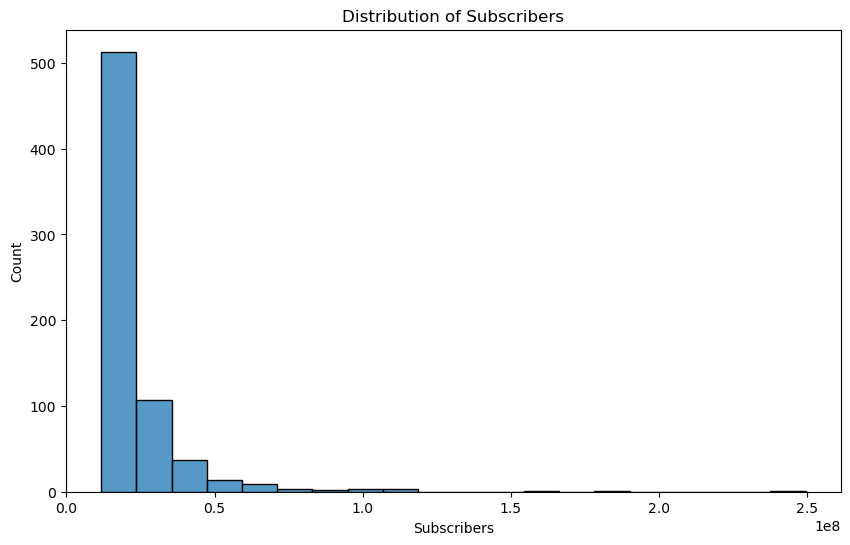

In [23]:
# Analyze the distribution of subscribers
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Suscribers', bins=20)
plt.title('Distribution of Subscribers')
plt.xlabel('Subscribers')
plt.ylabel('Count')
plt.show()